In [ ]:
#Libraries
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [ ]:
df_train = pd.read_csv('train.csv')

In [ ]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [1,0,0,1,0,1],
        'd': [0,1,0,1,1,1],
        'e': [1,1,1,1,1,1]
       }
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e'])
df

,a,b,c,d,e
0,0,0,1,0,1
1,0,1,0,1,1
2,1,0,0,0,1
3,0,1,1,1,1
4,0,1,0,1,1
5,0,1,1,1,1


### Remove duplicate rows

In [ ]:
# Remove Duplicate rows
df.drop_duplicates(subset=None, inplace=True)

In [ ]:
df

,a,b,c,d,e
0,0,0,1,0,1
1,0,1,0,1,1
2,1,0,0,0,1
3,0,1,1,1,1


### Get and remove duplicate columns

In [ ]:
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)


In [ ]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)
 
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)


Duplicate Columns are as follows
Column name :  d


In [ ]:
# Delete duplicate columns
newDf = df.drop(columns=getDuplicateColumns(df))

print("Modified Dataframe", newDf, sep='\n')

Modified Dataframe
   a  b  c  e
0  0  0  1  1
1  0  1  0  1
2  1  0  0  1
3  0  1  1  1



### Drops constant features

In [ ]:
# Drops constant columns of pandas dataframe.
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result

In [ ]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [2,2,2,2,2,2],
        'd': [0,1,0,1,1,1],
        'e': [1,0,0,1,0,1],
        'f': [1,1,1,1,1,1]
       }
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f'])

In [ ]:
df

,a,b,c,d,e,f
0,0,0,2,0,1,1
1,0,1,2,1,0,1
2,1,0,2,0,0,1
3,0,1,2,1,1,1
4,0,1,2,1,0,1
5,0,1,2,1,1,1


In [ ]:
df1 = drop_constant_columns(df)

In [ ]:
df1

,a,b,d,e
0,0,0,0,1
1,0,1,1,0
2,1,0,0,0
3,0,1,1,1
4,0,1,1,0
5,0,1,1,1


### Other option for droping constant features: Remove Duplicate Features

In [ ]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [1,0,0,1,0,1],
        'd': [1,0,0,1,0,1],
        'e': [5,5,5,5,5,5],
        'f': [0,0,1,0,0,0],
        'g': [0,0,0,0,0,1]}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df

,a,b,c,d,e,f,g
0,0,0,1,1,5,0,0
1,0,1,0,0,5,0,0
2,1,0,0,0,5,1,0
3,0,1,1,1,5,0,0
4,0,1,0,0,5,0,0
5,0,1,1,1,5,0,1


In [ ]:
# removing duplicate features using transpose
df_T = df.T  
df_T.shape

(7, 6)

In [ ]:
print(df_T.duplicated().sum())

2


In [ ]:
unique_df = df_T.drop_duplicates(keep='first').T  

In [ ]:
unique_df

,a,b,c,e,g
0,0,0,1,5,0
1,0,1,0,5,0
2,1,0,0,5,0
3,0,1,1,5,0
4,0,1,0,5,0
5,0,1,1,5,1


In [ ]:
duplicated_features = [dup_col for dup_col in df.columns if dup_col not in unique_df.columns]  
duplicated_features  

['d', 'f']

### Remove features with low variance

In [ ]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [1,0,0,1,0,1],
        'd': [5,5,5,5,5,5],
        'e': [0,0,0,0,0,1]}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e'])

In [ ]:
df

,a,b,c,d,e
0,0,0,1,5,0
1,0,1,0,5,0
2,1,0,0,5,0
3,0,1,1,5,0
4,0,1,0,5,0
5,0,1,1,5,1


In [ ]:
# Remove those that are constant in at least 80% of the instances
variance_filter = VarianceThreshold(threshold=(.8 * (1 - .8)))
variance_filter.fit(df)

VarianceThreshold(threshold=0.15999999999999998)

In [ ]:
len(df.columns[variance_filter.get_support()])  

2

In [ ]:
constant_columns = [column for column in df.columns
                    if column not in df.columns[variance_filter.get_support()]]

print(len(constant_columns))  

3


In [ ]:
for column in constant_columns:
    print(column)

a
d
e


In [ ]:
#df1 = variance_filter.transform(df)  

df.drop(labels=constant_columns, axis=1, inplace=True)  


df.shape

(6, 2)

In [ ]:
df

,b,c
0,0,1
1,1,0
2,0,0
3,1,1
4,1,0
5,1,1


### Remove Duplicate Features

In [ ]:
alfa = {'a': [0,0,1,0,0,0],
        'b': [0,1,0,1,1,1],
        'c': [1,0,0,1,0,1],
        'd': [1,0,0,1,0,1],
        'e': [5,5,5,5,5,5],
        'f': [0,0,1,0,0,0],
        'g': [0,0,0,0,0,1]}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [ ]:
df

,a,b,c,d,e,f,g
0,0,0,1,1,5,0,0
1,0,1,0,0,5,0,0
2,1,0,0,0,5,1,0
3,0,1,1,1,5,0,0
4,0,1,0,0,5,0,0
5,0,1,1,1,5,0,1


In [ ]:
# removing duplicate features using transpose
df_T = df.T  
df_T.shape  

(7, 6)

In [ ]:
df_T

,0,1,2,3,4,5
a,0,0,1,0,0,0
b,0,1,0,1,1,1
c,1,0,0,1,0,1
d,1,0,0,1,0,1
e,5,5,5,5,5,5
f,0,0,1,0,0,0
g,0,0,0,0,0,1


In [ ]:
print(df_T.duplicated().sum())

2


In [ ]:
print(df_T.duplicated())

a    False
b    False
c    False
d     True
e    False
f     True
g    False
dtype: bool


In [ ]:
unique_df = df_T.drop_duplicates(keep='first').T  

In [ ]:
unique_df

,a,b,c,e,g
0,0,0,1,5,0
1,0,1,0,5,0
2,1,0,0,5,0
3,0,1,1,5,0
4,0,1,0,5,0
5,0,1,1,5,1


In [ ]:
duplicated_features = [dup_col for dup_col in df.columns if dup_col not in unique_df.columns]  
duplicated_features  

['d', 'f']

### Select numeric columns only

In [ ]:
alfa = {'a': [0,0,1,0,0,0],
        'b': ['b0','b2','b4','b1','b3','b2'],
        'c': ['c4','c5','c1','c0','c7','c2'],
        'd': [1,0,0,1,0,1],
        'e': ['e3','e5','e2','e8','e0','e9'],
        'f': [0,0,1,0,0,0],
        'g': [0,0,0,0,0,1]}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [ ]:
df

,a,b,c,d,e,f,g
0,0,b0,c4,1,e3,0,0
1,0,b2,c5,0,e5,0,0
2,1,b4,c1,0,e2,1,0
3,0,b1,c0,1,e8,0,0
4,0,b3,c7,0,e0,0,0
5,0,b2,c2,1,e9,0,1


In [ ]:
df_numerics_only = df.select_dtypes(include=[np.number])

In [ ]:
df_numerics_only

,a,d,f,g
0,0,1,0,0
1,0,0,0,0
2,1,0,1,0
3,0,1,0,0
4,0,0,0,0
5,0,1,0,1


#### Select non numeric columns only (From the function above)

In [ ]:
df_chars = [char_col for char_col in df.columns if char_col not in df_numerics_only.columns]  
df_chars 

['b', 'c', 'e']

In [ ]:
df_chars1 = df[['b', 'c', 'e']]

In [ ]:
df_chars1

,b,c,e
0,b0,c4,e3
1,b2,c5,e5
2,b4,c1,e2
3,b1,c0,e8
4,b3,c7,e0
5,b2,c2,e9


#### Select objetct columns only

In [ ]:
df.select_dtypes(include=[np.object])

,b,c,e
0,b0,c4,e3
1,b2,c5,e5
2,b4,c1,e2
3,b1,c0,e8
4,b3,c7,e0
5,b2,c2,e9


### Correlation

In [ ]:
df_train = pd.read_csv('train.csv')
df_train.head()

In [ ]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


(38.5, -0.5)

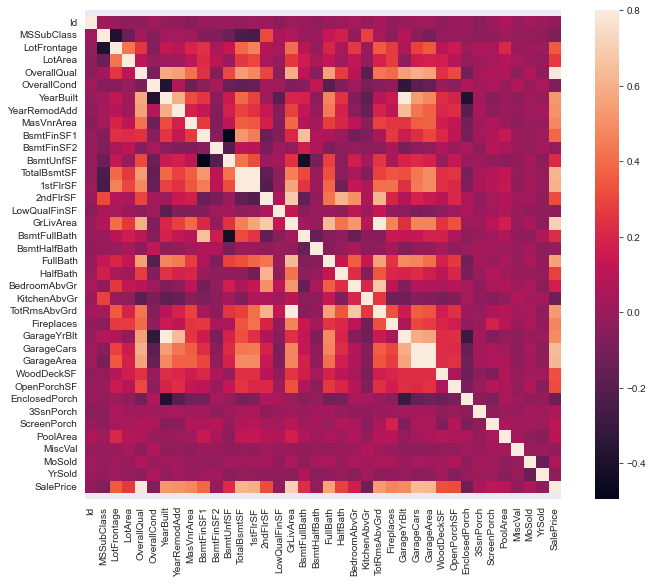

In [ ]:
#correlation matrix
sb.set_style("darkgrid")
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

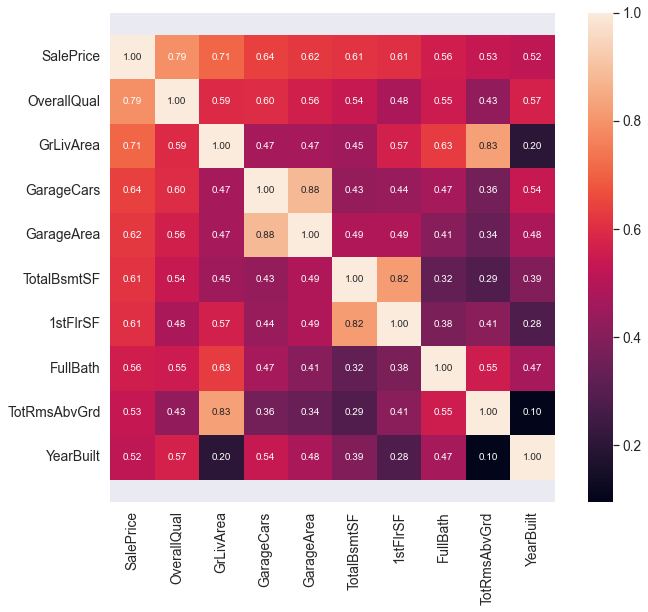

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sb.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(12, 9))
hm = sb.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

#### Removing Correlated Features

In [ ]:
alfa = {'a': [3,7,2,15,7,20],
        'b': ['b0','b2','b4','b1','b3','b2'],
        'c': [1,1,1,1,0,1],
        'd': ['c4','c5','c1','c0','c7','c2'],
        'e': [1,0,0,1,0,1],
        'f': ['e3','e5','e2','e8','e0','e9'],
        'g': [1,2,3,4,1,6],
        'h': [1,2,1,4,5,6],
        'i': [5,4,3,2,1,1],
        'j': [1,2,3,4,5,6],}
df = DataFrame(alfa, columns=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
# np.corrcoef(df['a'], df['g'])

In [ ]:
df

,a,b,c,d,e,f,g,h,i,j
0,3,b0,1,c4,1,e3,1,1,5,1
1,7,b2,1,c5,0,e5,2,2,4,2
2,2,b4,1,c1,0,e2,3,1,3,3
3,15,b1,1,c0,1,e8,4,4,2,4
4,7,b3,0,c7,0,e0,1,5,1,5
5,20,b2,1,c2,1,e9,6,6,1,6


In [ ]:
df_numerics_only = df.select_dtypes(include=[np.number])

In [ ]:
correlated_features = set()  
correlation_matrix = df_numerics_only.corr()  

In [ ]:
type(correlation_matrix)

pandas.core.frame.DataFrame

In [ ]:
for i in range(len(correlation_matrix.columns)):  
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

In [ ]:
len(correlated_features) 

4

In [ ]:
print(correlated_features)  

{'h', 'g', 'i', 'j'}


In [ ]:
df.drop(labels=correlated_features, axis=1, inplace=True)  

In [ ]:
df

,a,b,c,d,e,f
0,3,b0,1,c4,1,e3
1,7,b2,1,c5,0,e5
2,2,b4,1,c1,0,e2
3,15,b1,1,c0,1,e8
4,7,b3,0,c7,0,e0
5,20,b2,1,c2,1,e9


### Correlations Matrix

In [ ]:
iris=sb.load_dataset('iris')

In [ ]:
irisNum=iris.iloc[:, 0:4]

In [ ]:
irisCorr = irisNum.corr(method='pearson')
irisCorr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


(4.5, -0.5)

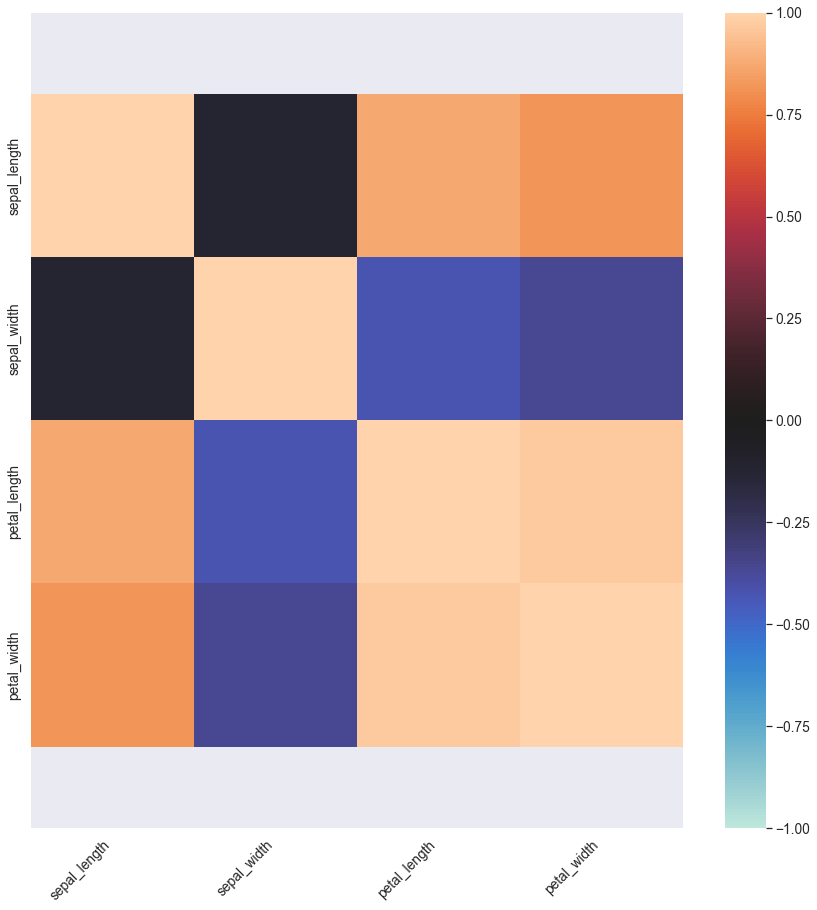

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
ax = sb.heatmap(
    irisCorr, 
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [ ]:
del iris, irisNum, irisCorr

#### Another option for correlation

In [ ]:
#import pandas as pd
#import numpy as np

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = df.corr()
corr.style.background_gradient(cmap='RdBu_r') #coolwarm
# 'coolwarm' & 'BrBG' are other good diverging colormaps

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.347533,0.398948,0.455743,0.072914,-0.233402,-0.731222,0.477978,-0.442621,0.015185
1,0.347533,1.000000,-0.284056,0.571003,-0.285483,0.382480,-0.362842,0.642578,0.252556,0.190047
2,0.398948,-0.284056,1.000000,-0.523649,0.152937,-0.139176,-0.092895,0.016266,-0.434016,-0.383585
3,0.455743,0.571003,-0.523649,1.000000,-0.225343,-0.227577,-0.481548,0.473286,0.279258,0.446650
4,0.072914,-0.285483,0.152937,-0.225343,1.000000,-0.104438,-0.147477,-0.523283,-0.614603,-0.189916
5,-0.233402,0.382480,-0.139176,-0.227577,-0.104438,1.000000,-0.030252,0.417640,0.205851,0.095084
6,-0.731222,-0.362842,-0.092895,-0.481548,-0.147477,-0.030252,1.000000,-0.494440,0.381407,-0.353652
7,0.477978,0.642578,0.016266,0.473286,-0.523283,0.417640,-0.494440,1.000000,0.375873,0.417863
8,-0.442621,0.252556,-0.434016,0.279258,-0.614603,0.205851,0.381407,0.375873,1.000000,0.150421
9,0.015185,0.190047,-0.383585,0.446650,-0.189916,0.095084,-0.353652,0.417863,0.150421,1.000000


### Change type from int64 to float64 and get log for skewed distributions

In [ ]:
df_train['LotArea'] = df_train['LotArea'].astype(dtype=np.float64)
var = np.log(df_train.LotArea)

In [ ]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Print feature levels

In [ ]:
print("Supplies Subgroup' : ",df_train['SaleCondition'].unique())

Supplies Subgroup' :  ['Normal' 'Abnorml' 'Partial' 'AdjLand' 'Alloca' 'Family']


### Get numeric values from a categorical feature

In [ ]:
#from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# create the Labelencoder object
le = LabelEncoder()
df_train['SaleConditionCode'] = le.fit_transform(df_train['SaleCondition'])
df_train[["SaleCondition", "SaleConditionCode"]].head(11)

,SaleCondition,SaleConditionCode
0,Normal,4
1,Normal,4
2,Normal,4
3,Abnorml,0
4,Normal,4
5,Normal,4
6,Normal,4
7,Normal,4
8,Abnorml,0
9,Normal,4


### Missing Data

### Missing data percentage

In [ ]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageQual,81,0.055479


In [ ]:
# Getting rid missing value features that have Total greater than 100
train = df_train.drop((missing_data[missing_data['Total'] > 100]).index,1)

#### Replace missing value with an specific value and mean

In [ ]:
df_train.GarageQual.value_counts(dropna=False)
df_train['GarageQual'].fillna('TA', inplace=True)

In [ ]:
mean_value=df_train['MasVnrArea'].mean()
df_train['MasVnrArea']=df_train['MasVnrArea'].fillna(mean_value)

#### Function to display graphically NaN values in a dataset

In [ ]:
datos = 'titanic.csv'
titanic = pd.read_csv(datos)

#### missmap Function

In [ ]:
def missmap(df, ax=None, colors=None, aspect=4, sort='descending',
            title=None, **kwargs):
    """
    Plot the missing values of df.

    Parameters
    ----------
    df : pandas DataFrame
    ax : matplotlib axes
        if None then a new figure and axes will be created
    colors : dict
        dict with {True: c1, False: c2} where the values are
        matplotlib colors.
    aspect : int
        the width to height ratio for each rectangle.
    sort : one of {'descending', 'ascending', None}
    title : str
    kwargs : dict
        matplotlib.axes.bar kwargs

    Returns
    -------
    ax : matplotlib axes

    """

    if ax is None:
        fig, ax = plt.subplots()

    # setup the axes
    dfn = pd.isnull(df)

    if sort in ('ascending', 'descending'):
        counts = dfn.sum()
        sort_dict = {'ascending': True, 'descending': False}
        counts = counts.sort_values(ascending=sort_dict[sort])
        dfn = dfn[counts.index]

    # Up to here
    ny = len(df)
    nx = len(df.columns)
    # each column is a stacked bar made up of ny patches.
    xgrid = np.tile(np.arange(nx), (ny, 1)).T
    ygrid = np.tile(np.arange(ny), (nx, 1))
    # xys is the lower left corner of each patch
    xys = (zip(x, y) for x, y in zip(xgrid, ygrid))

    if colors is None:
        colors = {True: '#EAF205', False: 'k'}

    widths = cycle([aspect])
    heights = cycle([1])

    for xy, width, height, col in zip(xys, widths, heights, dfn.columns):
        color_array = dfn[col].map(colors)

        rects = [Rectangle(xyc, width, height, **kwargs)
                 for xyc, c in zip(xy, color_array)]

        p_coll = collections.PatchCollection(rects, color=color_array,
                                             edgecolor=color_array, **kwargs)
        ax.add_collection(p_coll, autolim=False)

    # post plot aesthetics
    ax.set_xlim(0, nx)
    ax.set_ylim(0, ny)

    ax.set_xticks(.5 + np.arange(nx))  # center the ticks
    ax.set_xticklabels(dfn.columns)
    for t in ax.get_xticklabels():
        t.set_rotation(90)

    # remove tick lines
    ax.tick_params(axis='both', which='both', bottom='off', left='off',
                   labelleft='off')
    ax.grid(False)

    if title:
        ax.set_title(title)
    return ax

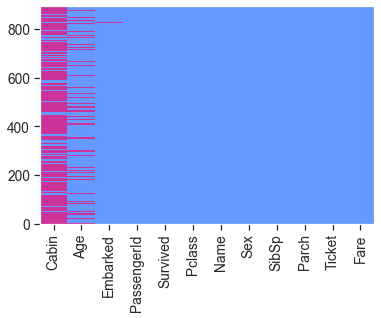

In [ ]:
colours = {True: "#CC3399", False: "#6699FF"}
ax = missmap(titanic, colors = colours)
plt.show(ax)

### Cross table (like R table)

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SaleConditionCode
0,1,60,RL,8450.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,208500,4
1,2,20,RL,9600.0,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,181500,4
2,3,60,RL,11250.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,9,2008,WD,Normal,223500,4
3,4,70,RL,9550.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,2,2006,WD,Abnorml,140000,0
4,5,60,RL,14260.0,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,12,2008,WD,Normal,250000,4


In [ ]:
# One var
pd.crosstab(index = train["Street"],
                              columns="count")

col_0,count
Street,
Grvl,6
Pave,1454


In [ ]:
# Two vars
pd.crosstab(index=train["Street"], 
            columns=train["LotShape"], margins=True)

LotShape,IR1,IR2,IR3,Reg,All
Street,,,,,
Grvl,1,1,0,4,6
Pave,483,40,10,921,1454
All,484,41,10,925,1460


### Convert to Categorical

In [ ]:
df1 = {
    'Name':['George','Andrea','micheal','maggie','Ravi',
               'Xien','Jalpa'],
   'Is_Male':[1,0,1,0,1,1,0]}
 
df1 = pd.DataFrame(df1,columns=['Name','Is_Male'])
 
print(df1)

      Name  Is_Male
0   George        1
1   Andrea        0
2  micheal        1
3   maggie        0
4     Ravi        1
5     Xien        1
6    Jalpa        0


In [ ]:
print(df1.dtypes)

Name       object
Is_Male     int64
dtype: object


In [ ]:
df1['Is_Male'] = pd.Categorical(df1.Is_Male)
print (df1.dtypes)

Name         object
Is_Male    category
dtype: object


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Name     7 non-null      object  
 1   Is_Male  7 non-null      category
dtypes: category(1), object(1)
memory usage: 315.0+ bytes


In [ ]:
del df1

### Outlier Treatment

#### Interquartiel range outlier removal. USE: rm_IQR_outliers(titanic, 'Fare')

In [ ]:
def rm_IQR_outliers(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    h = 3*iqr # originally 1.5
    df.loc[df[var] > q3+h, var] = q3+h
    df.loc[df[var] < q1-h, var] = q1-h

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
rm_IQR_outliers(titanic, 'Fare')

In [ ]:
titanic.Fare.describe()

count    891.000000
mean      27.043158
std       27.339465
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      100.268800
Name: Fare, dtype: float64

### Standardize and Normalize

#### Standardize

In [ ]:
# from sklearn import preprocessing
datos = 'titanic.csv'
titanic = pd.read_csv(datos)
df_numerics_only = titanic.select_dtypes(include=[np.number])
df_numerics_only = df_numerics_only.iloc[:, np.r_[0:2,4,6]]

In [ ]:
df_numerics_only.head()

,PassengerId,Survived,SibSp,Fare
0,1,0,1,7.2500
1,2,1,1,71.2833
2,3,1,0,7.9250
3,4,1,1,53.1000
4,5,0,0,8.0500


In [ ]:
# Get column names first
names = ['Fare']
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(titanic[names])
scaled_df = pd.DataFrame(scaled_df, columns=names)

In [ ]:
scaled_df.head()

,Fare
0,-0.502445
1,0.786845
2,-0.488854
3,0.420730
4,-0.486337


In [ ]:
del scaled_df, df_numerics_only

#### Normalize

In [ ]:
names = ['Fare'] # or names = df.columns
# Normalize total_bedrooms column
#x_array = np.array(titanic['Fare'])
x_array = np.array(titanic['Fare'])
normalized_X = preprocessing.normalize([x_array])
normalized_df = pd.DataFrame(normalized_X.flatten(), columns=names)

In [ ]:
normalized_df.head()

,Fare
0,0.004103
1,0.040344
2,0.004485
3,0.030053
4,0.004556


In [ ]:
del normalized_X, normalized_df

### One-hot encoding

In [ ]:
cat_columns = ["Sex"]
df = pd.get_dummies(titanic, prefix_sep="_",
                              columns=cat_columns)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [ ]:
del df

### Change column name in a Data Frame

In [ ]:
# Data Frame df it changes from Name to Nombre
df=titanic
df.rename(columns={'Name':'Nombre'}, inplace=True)

### Binning - Discretize

<AxesSubplot:ylabel='Frequency'>

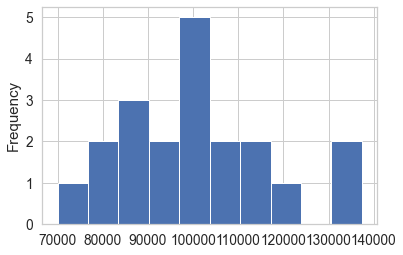

In [ ]:
sb.set_style('whitegrid')

raw_df = pd.read_excel('2018_Sales_Total.xlsx')
df = raw_df.groupby(['account number', 'name'])['ext price'].sum().reset_index()

df['ext price'].plot(kind='hist')

In [ ]:
df['ext price'].describe()

count        20.000000
mean     100939.216000
std       17675.097485
min       70004.360000
25%       89137.707500
50%      100271.535000
75%      110132.552500
max      137351.960000
Name: ext price, dtype: float64

#### Quantile-based Frequency discretization function

In [ ]:
df['extPriceQuantile'] = pd.qcut(df['ext price'], q=4)

In [ ]:
df.head()

,account number,name,ext price,extPriceQuantile
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]"
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]"
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]"
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]"
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]"


In [ ]:
df['extPriceQuantile'].unique()

[(70004.359, 89137.708], (89137.708, 100271.535], (110132.552, 137351.96], (100271.535, 110132.552]]
Categories (4, interval[float64, right]): [(70004.359, 89137.708] < (89137.708, 100271.535] < (100271.535, 110132.552] < (110132.552, 137351.96]]

In [ ]:
df['extPriceQuantile'].nunique()

4

In [ ]:
df['extPriceQuantile'].value_counts()

(70004.359, 89137.708]      5
(89137.708, 100271.535]     5
(100271.535, 110132.552]    5
(110132.552, 137351.96]     5
Name: extPriceQuantile, dtype: int64

In [ ]:
df['extPriceDecile'] = pd.qcut(df['ext price'], q=10, precision=0)

In [ ]:
df['extPriceDecile'].head()

0      (82368.0, 87168.0]
1     (95908.0, 100272.0]
2      (70003.0, 82368.0]
3    (124627.0, 137352.0]
4      (90686.0, 95908.0]
Name: extPriceDecile, dtype: category
Categories (10, interval[float64, right]): [(70003.0, 82368.0] < (82368.0, 87168.0] < (87168.0, 90686.0] < (90686.0, 95908.0] ... (103606.0, 105938.0] < (105938.0, 112290.0] < (112290.0, 124627.0] < (124627.0, 137352.0]]

In [ ]:
df['extPriceDecile'].nunique()

10

In [ ]:
df['extPriceDecile'].value_counts()

(70003.0, 82368.0]      2
(82368.0, 87168.0]      2
(87168.0, 90686.0]      2
(90686.0, 95908.0]      2
(95908.0, 100272.0]     2
(100272.0, 103606.0]    2
(103606.0, 105938.0]    2
(105938.0, 112290.0]    2
(112290.0, 124627.0]    2
(124627.0, 137352.0]    2
Name: extPriceDecile, dtype: int64

In [ ]:
bin_labels_5 = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']
df['quantile_ex_3'] = pd.qcut(df['ext price'],
                              q=[0, .2, .4, .6, .8, 1],
                              labels=bin_labels_5)
df.head()

,account number,name,ext price,extPriceQuantile,extPriceDecile,quantile_ex_3
0,141962,Herman LLC,82865.00,"(70004.359, 89137.708]","(82368.0, 87168.0]",Bronze
1,146832,Kiehn-Spinka,99608.77,"(89137.708, 100271.535]","(95908.0, 100272.0]",Gold
2,163416,Purdy-Kunde,77898.21,"(70004.359, 89137.708]","(70003.0, 82368.0]",Bronze
3,218895,Kulas Inc,137351.96,"(110132.552, 137351.96]","(124627.0, 137352.0]",Diamond
4,239344,Stokes LLC,91535.92,"(89137.708, 100271.535]","(90686.0, 95908.0]",Silver


In [ ]:
df['quantile_ex_3'].value_counts()

Bronze      4
Silver      4
Gold        4
Platinum    4
Diamond     4
Name: quantile_ex_3, dtype: int64

#### Bin defined binning

In [ ]:
df['extPriceUser'] = pd.cut(df['ext price'], bins=7)

In [ ]:
df['extPriceUser'].unique()

[(79625.446, 89246.531], (98867.617, 108488.703], (69937.012, 79625.446], (127730.874, 137351.96], (89246.531, 98867.617], (108488.703, 118109.789], (118109.789, 127730.874]]
Categories (7, interval[float64, right]): [(69937.012, 79625.446] < (79625.446, 89246.531] < (89246.531, 98867.617] < (98867.617, 108488.703] < (108488.703, 118109.789] < (118109.789, 127730.874] < (127730.874, 137351.96]]

In [ ]:
df['extPriceUser'].nunique()

7

In [ ]:
df['extPriceUser'].value_counts()

(98867.617, 108488.703]     5
(89246.531, 98867.617]      4
(79625.446, 89246.531]      3
(108488.703, 118109.789]    3
(69937.012, 79625.446]      2
(127730.874, 137351.96]     2
(118109.789, 127730.874]    1
Name: extPriceUser, dtype: int64

#### Other Binning example


In [ ]:
df = titanic
df.loc[:, 'Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
bins = [0, 12, 25, 50, 80] # IMPORTANT! For example the interval 12 to 25 means 12 to 24 
group_names = ['Niño', 'Adolecente', 'Adulto', 'Mayor']
df['Edad'] =  pd.cut(df['Age'], bins, labels=group_names)

In [ ]:
df.Edad.value_counts()

Adulto        349
Adolecente    232
Niño           69
Mayor          64
Name: Edad, dtype: int64

In [ ]:
del df

### Graphics

In [ ]:
address = 'mtcars.csv'
cars = pd.read_csv(address)
cars.head(10)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


### matplotlib Histogram

<AxesSubplot:ylabel='Frequency'>

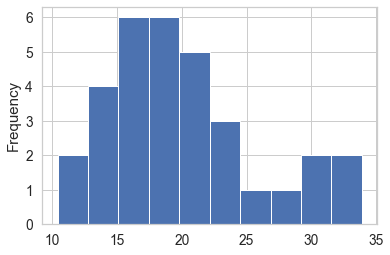

In [ ]:
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.index = cars.car_names
mpg = cars['mpg']
mpg.plot(kind = 'hist')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

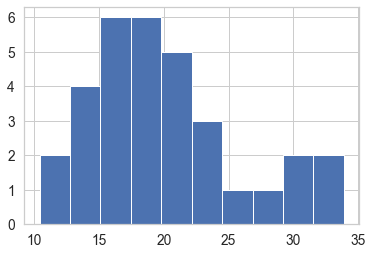

In [ ]:
plt.hist(mpg)
plt.plot

array([[<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'cyl'}>,
        <AxesSubplot:title={'center':'disp'}>],
       [<AxesSubplot:title={'center':'hp'}>,
        <AxesSubplot:title={'center':'drat'}>,
        <AxesSubplot:title={'center':'wt'}>],
       [<AxesSubplot:title={'center':'qsec'}>,
        <AxesSubplot:title={'center':'vs'}>,
        <AxesSubplot:title={'center':'am'}>],
       [<AxesSubplot:title={'center':'gear'}>,
        <AxesSubplot:title={'center':'carb'}>, <AxesSubplot:>]],
      dtype=object)

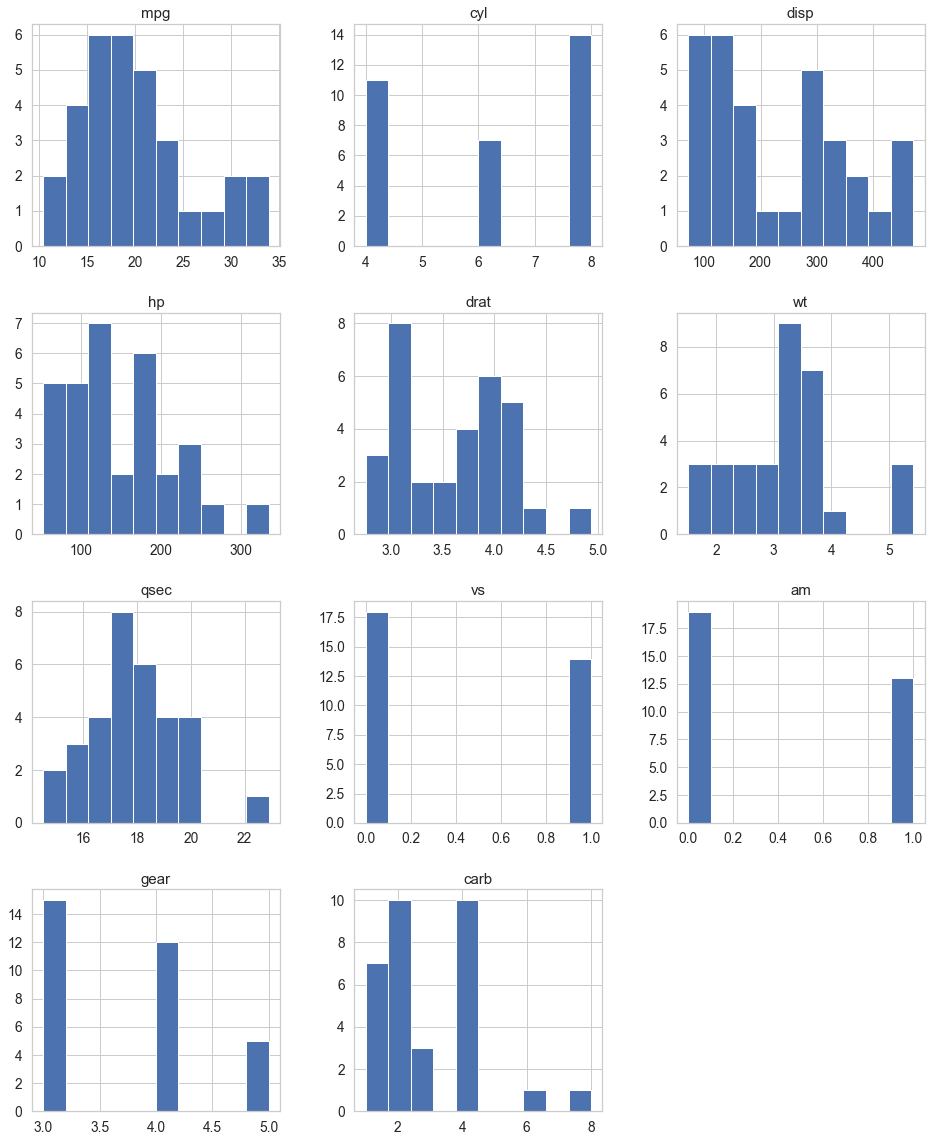

In [ ]:
cars.hist(figsize=(16, 20)) #, xlabelsize=8, ylabelsize=8)
# cars.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

In [ ]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### seaborn Histogram

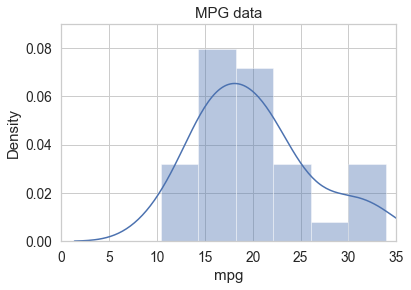

In [ ]:
fig = sb.distplot(mpg)
plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('mpg')
plt.xlim(0,35)
plt.ylim(0,0.09)
plt.title('MPG data')
plt.show(fig)

### matplotlib Scatter plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='hp', ylabel='mpg'>

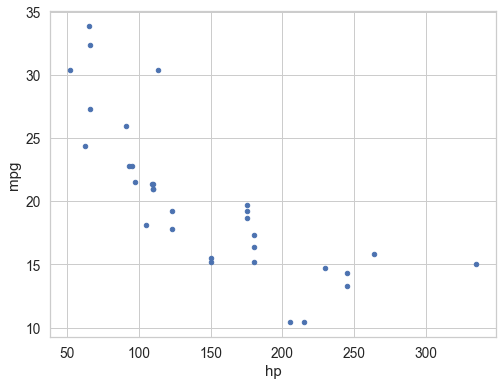

In [ ]:
cars.plot(kind='scatter', x='hp', y='mpg')

### Seaborn Scatter plot

<AxesSubplot:xlabel='hp', ylabel='mpg'>

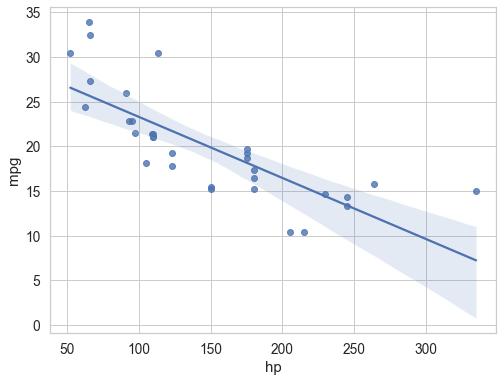

In [ ]:
sb.regplot(x='hp', y='mpg', data = cars, scatter=True)

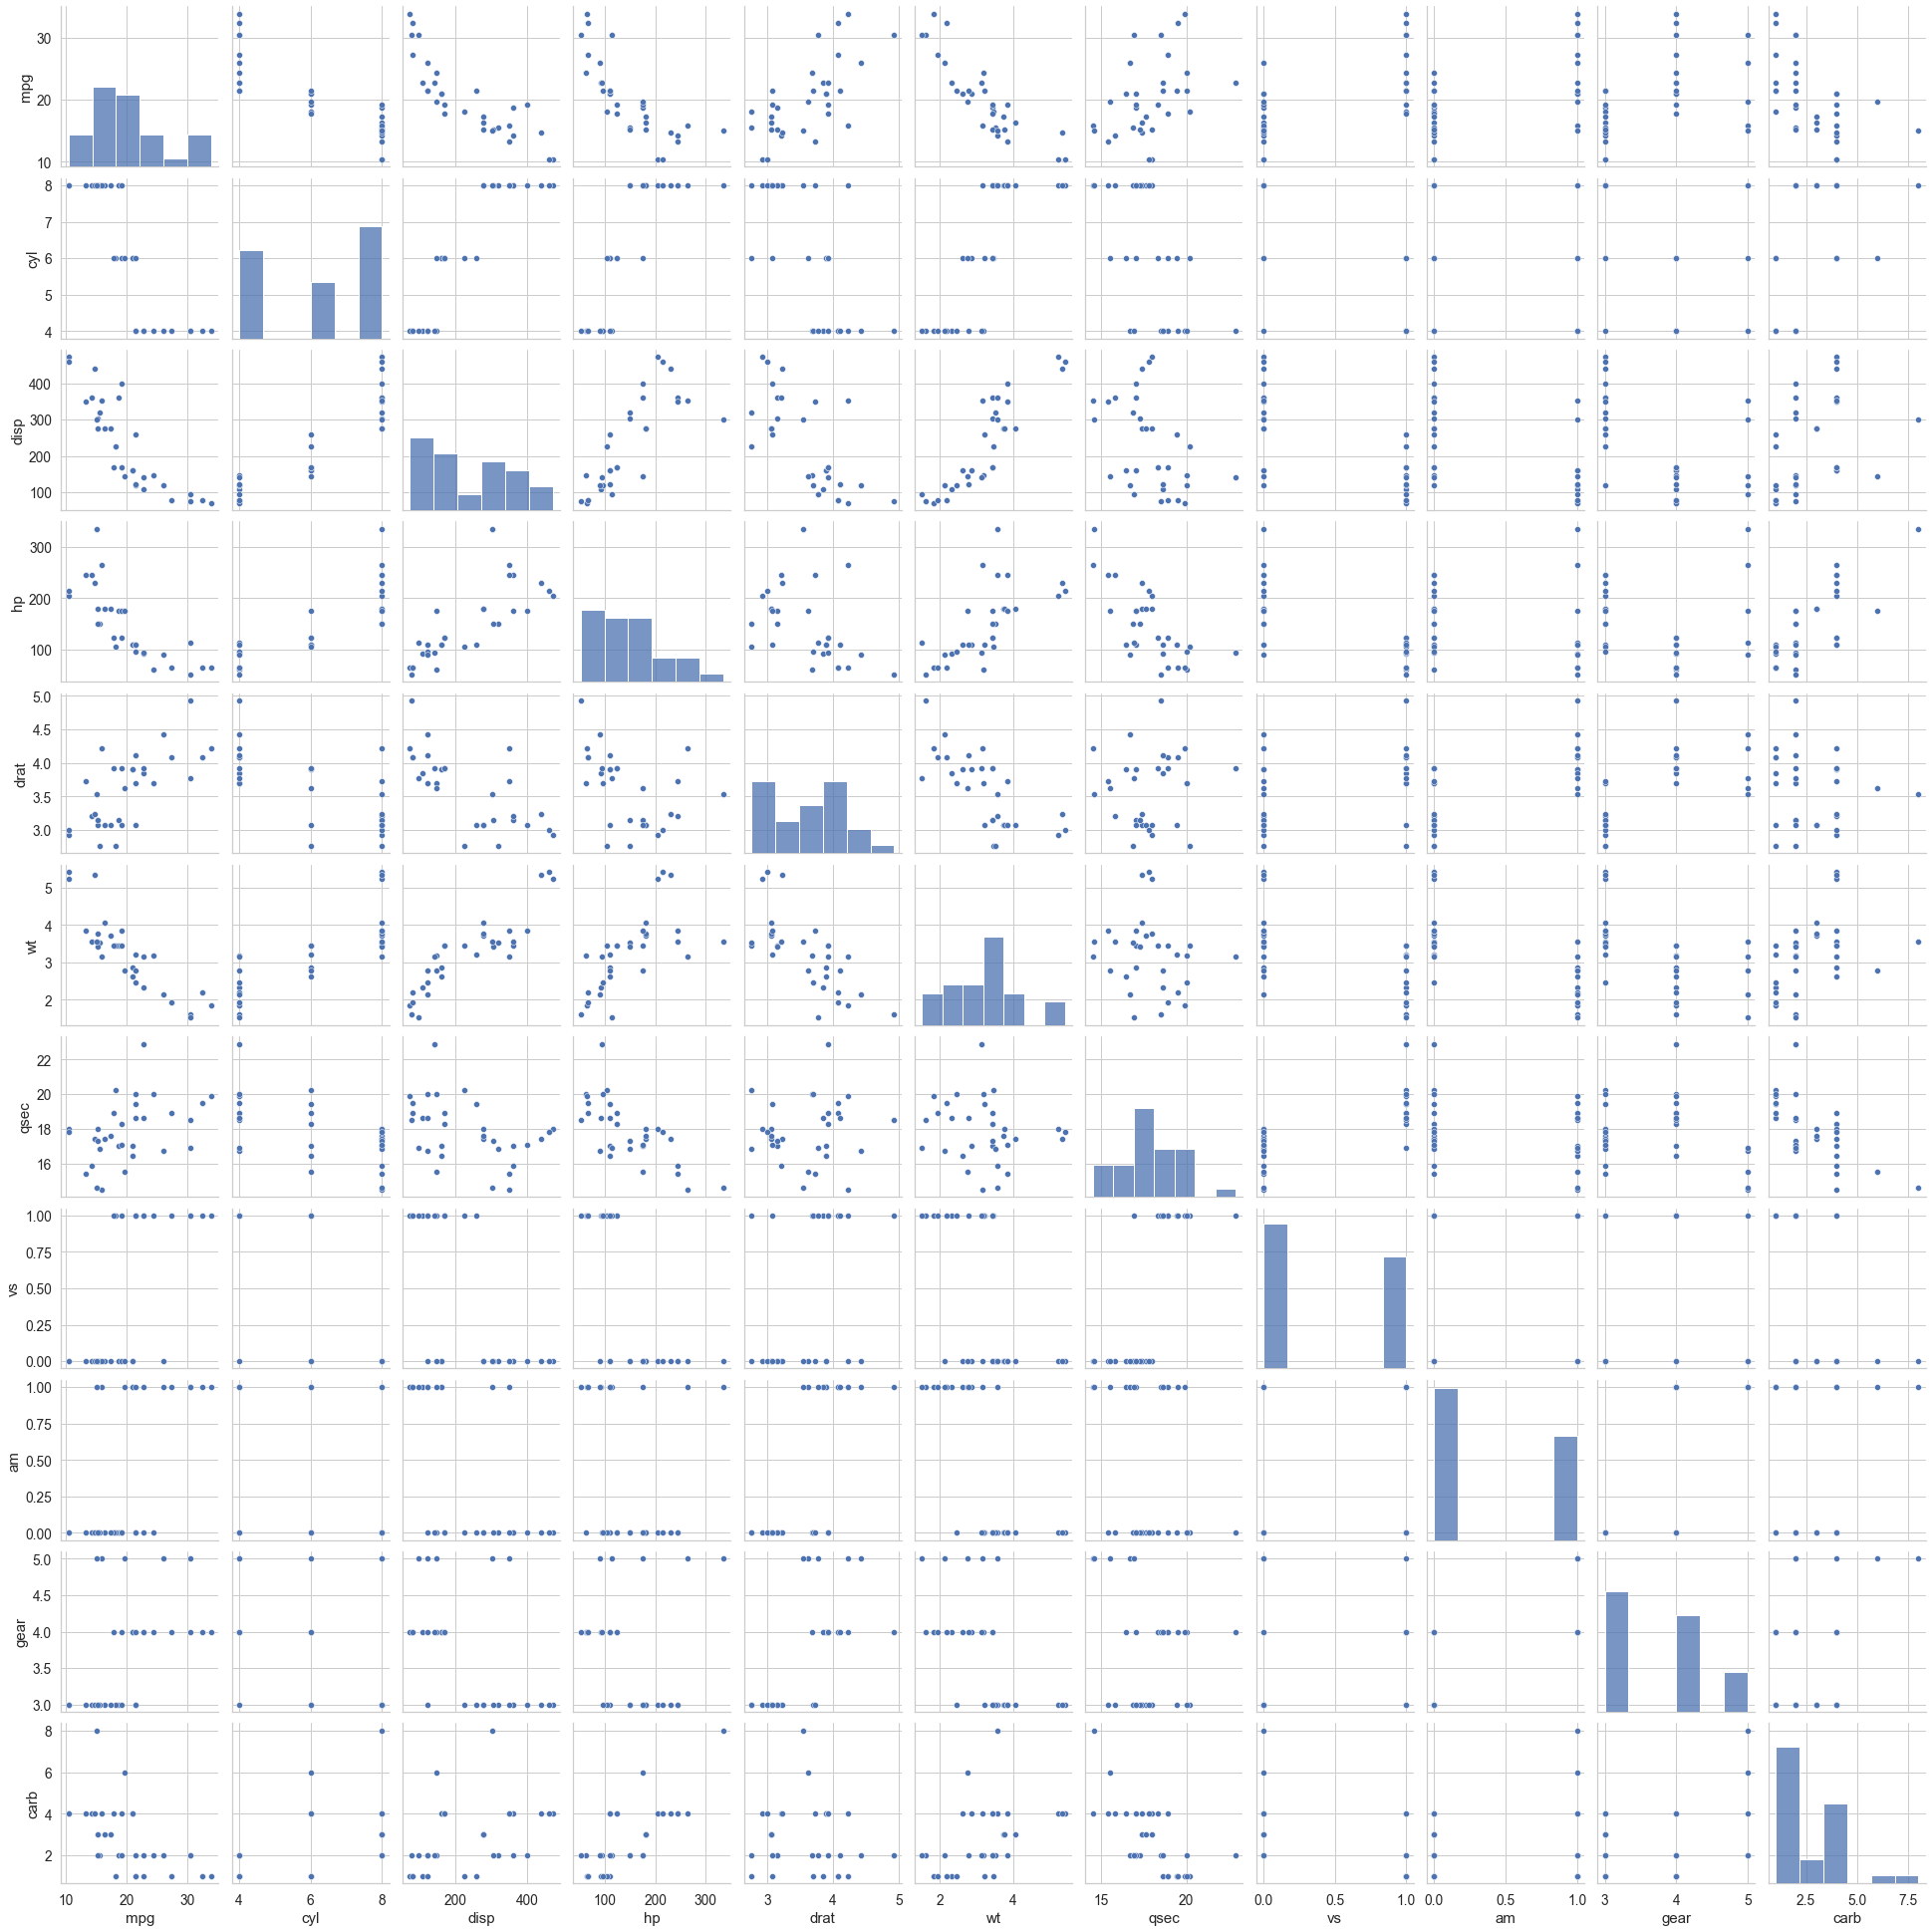

In [ ]:
sb.pairplot(cars)

In [ ]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


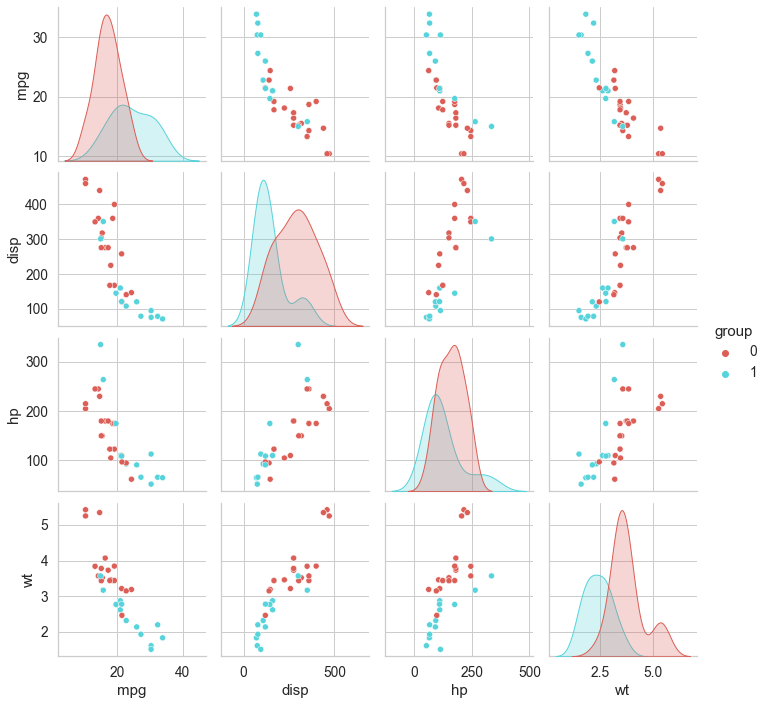

In [ ]:
cars_df = pd.DataFrame((cars.iloc[:, [1,3,4,6]].values), columns = ['mpg', 'disp', 'hp', 'wt'])
cars_target = cars.iloc[:, 9].values
#target_names = [0, 1]

cars_df['group'] = pd.Series(cars_target, dtype="category")
sb.pairplot(cars_df, hue = "group", palette = 'hls')

### matplotlib boxplot

<AxesSubplot:title={'center':'wt'}, xlabel='am'>

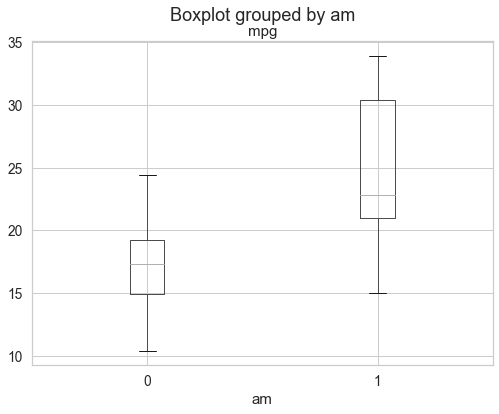

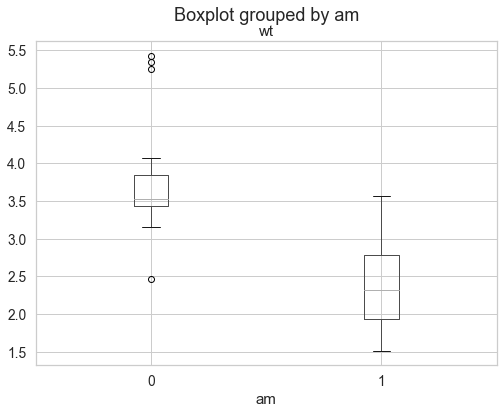

In [ ]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

### seaborn boxplot

<AxesSubplot:xlabel='am', ylabel='mpg'>

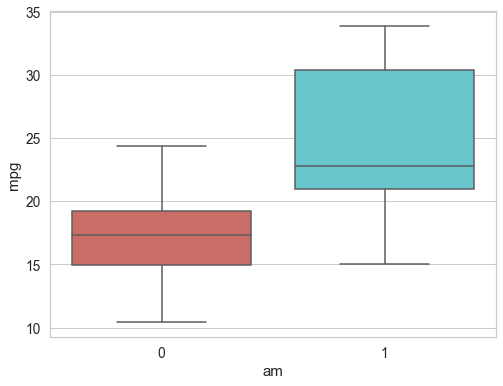

In [ ]:
sb.boxplot(x='am', y='mpg', data=cars, palette='hls')

In [ ]:
tips = sb.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### seaborn Bar plot

<AxesSubplot:xlabel='day', ylabel='tip'>

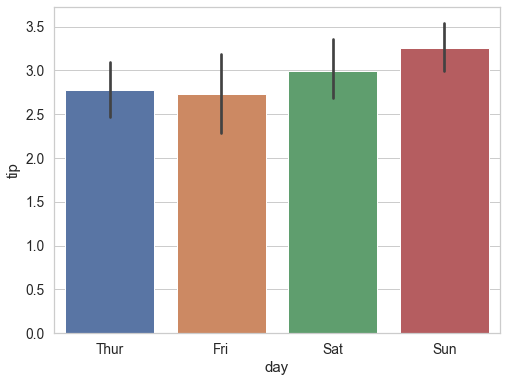

In [ ]:
sb.barplot(x='day', y='tip', data=tips)

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='tip'>

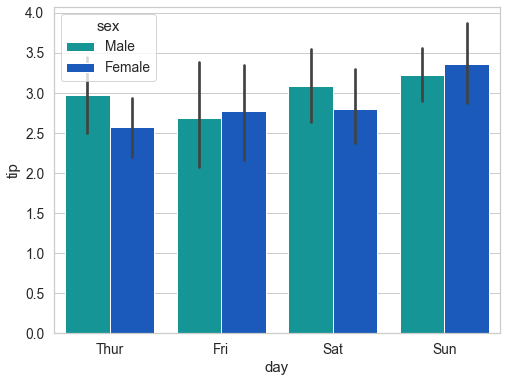

In [ ]:
sb.barplot(x='day', y='tip', data=tips, hue ='sex', palette = 'winter_r')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

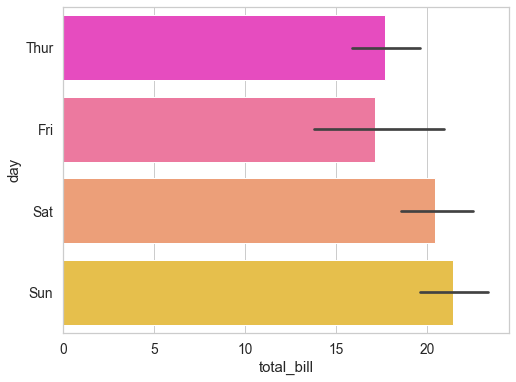

In [ ]:
sb.barplot(x='total_bill', y='day', data=tips, palette='spring')

<AxesSubplot:xlabel='day', ylabel='tip'>

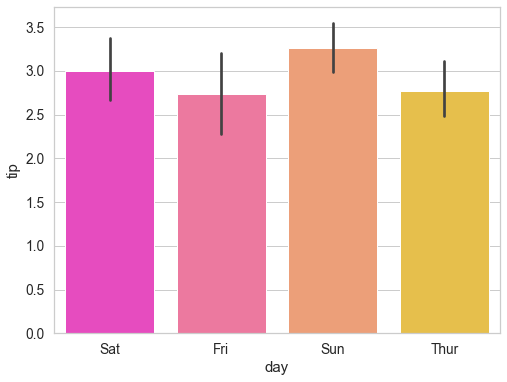

In [ ]:
sb.barplot(x='day', y='tip', data=tips, palette='spring', order=['Sat','Fri','Sun','Thur'])

<AxesSubplot:xlabel='day', ylabel='total_bill'>

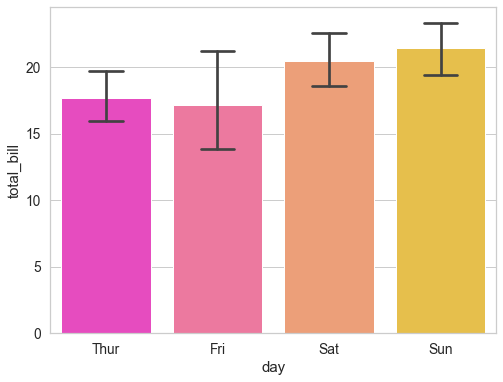

In [ ]:
sb.barplot(x='day', y='total_bill', data=tips, estimator=mean, palette='spring', capsize = 0.3)

<AxesSubplot:xlabel='smoker', ylabel='tip'>

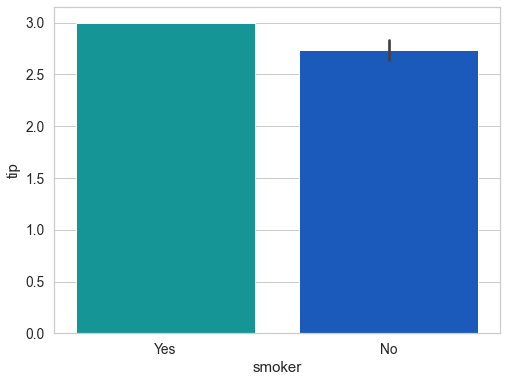

In [ ]:
sb.barplot(x='smoker', y='tip', data=tips, ci=34, palette='winter_r', estimator=median)

In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

### seaborn Distribution / Histogram plot

<AxesSubplot:xlabel='tip', ylabel='Density'>

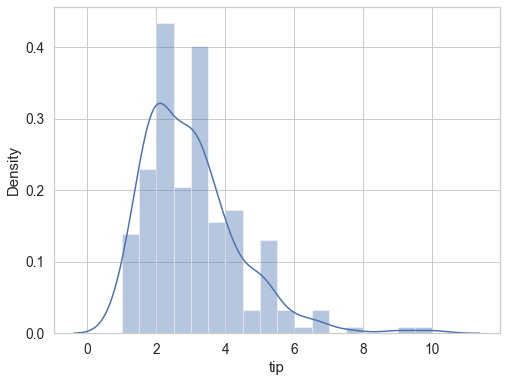

In [ ]:
sb.distplot(tips['tip'])

<AxesSubplot:xlabel='Density', ylabel='tip'>

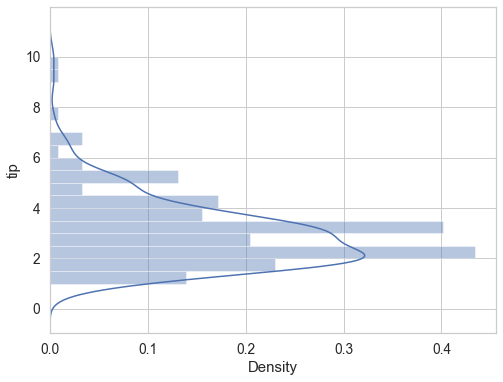

In [ ]:
sb.distplot(tips['tip'], vertical=True)

<AxesSubplot:xlabel='tip', ylabel='Density'>

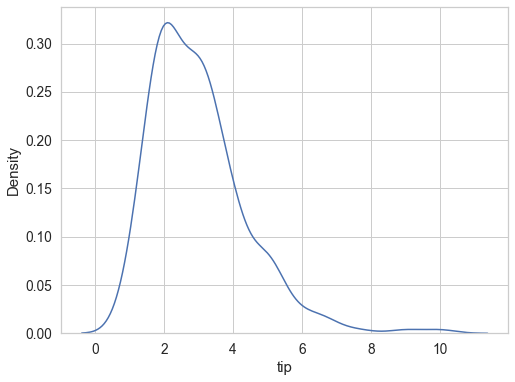

In [ ]:
sb.distplot(tips['tip'], hist=False)

<AxesSubplot:xlabel='tip', ylabel='Density'>

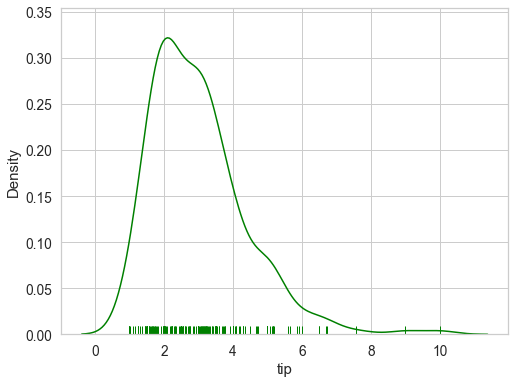

In [ ]:
sb.distplot(tips['tip'], hist=False, rug=True, color='green')

### seaborn Box plot

<AxesSubplot:xlabel='size'>

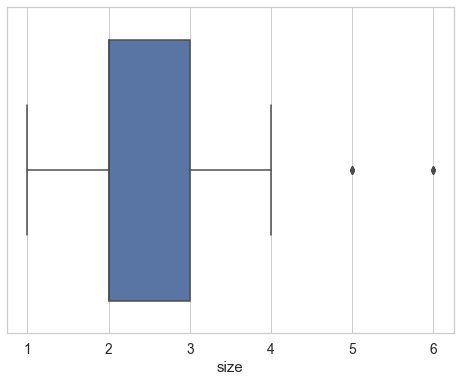

In [ ]:
sb.boxplot(tips['size'])

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

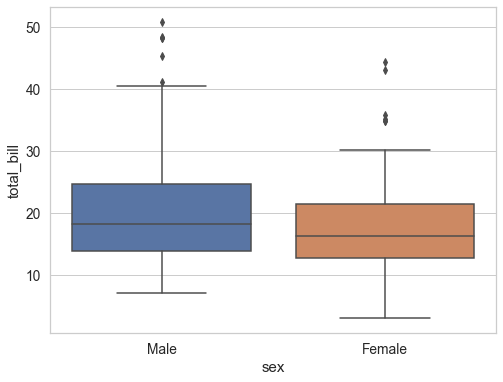

In [ ]:
sb.boxplot(x='sex', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

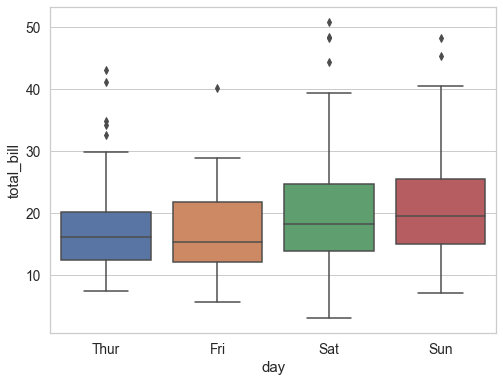

In [ ]:
sb.boxplot(x='day', y='total_bill', data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

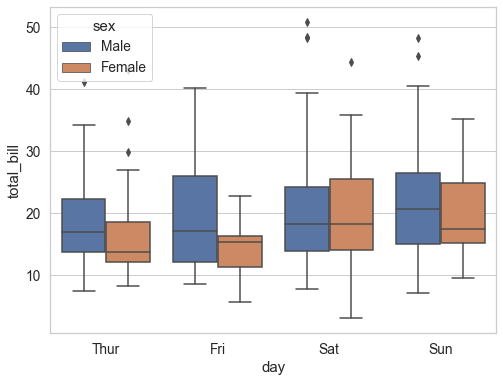

In [ ]:
sb.boxplot(x='day', y='total_bill', data=tips, hue='sex')

In [ ]:
iris=sb.load_dataset('iris')

<AxesSubplot:>

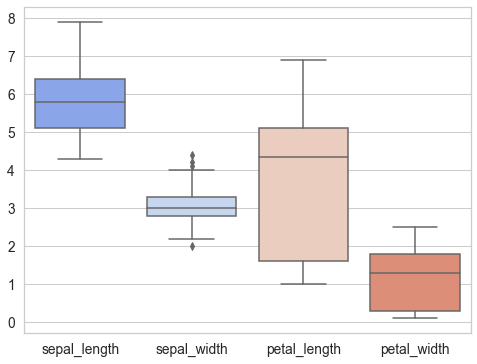

In [ ]:
sb.boxplot(data=iris, palette='coolwarm')

<AxesSubplot:>

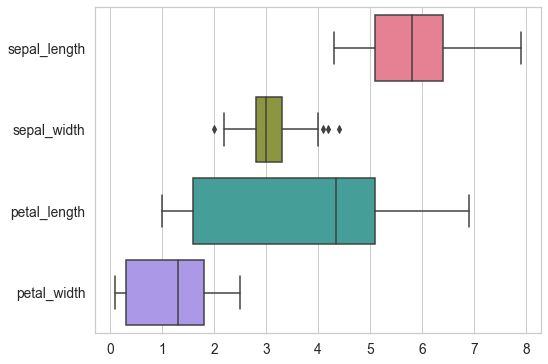

In [ ]:
sb.boxplot(data=iris, orient='horizontal', palette='husl') # horizontal or h

<AxesSubplot:xlabel='day', ylabel='total_bill'>

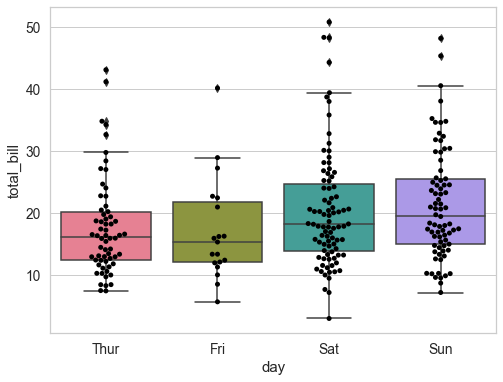

In [ ]:
sb.boxplot(x='day', y='total_bill', data=tips, palette='husl')
sb.swarmplot(x='day', y='total_bill', data=tips, color='black')

### seaborn Scatter plot

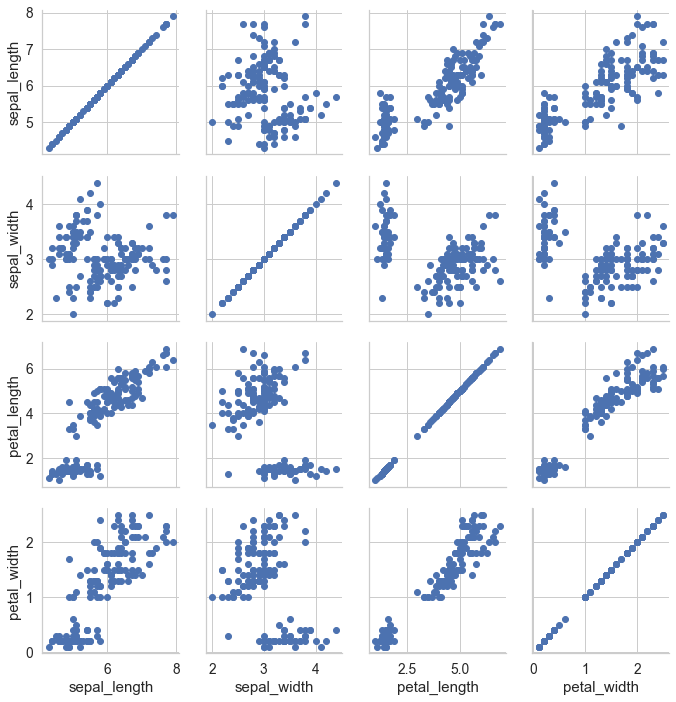

In [ ]:
x = sb.PairGrid(iris)
x = x.map(plt.scatter)

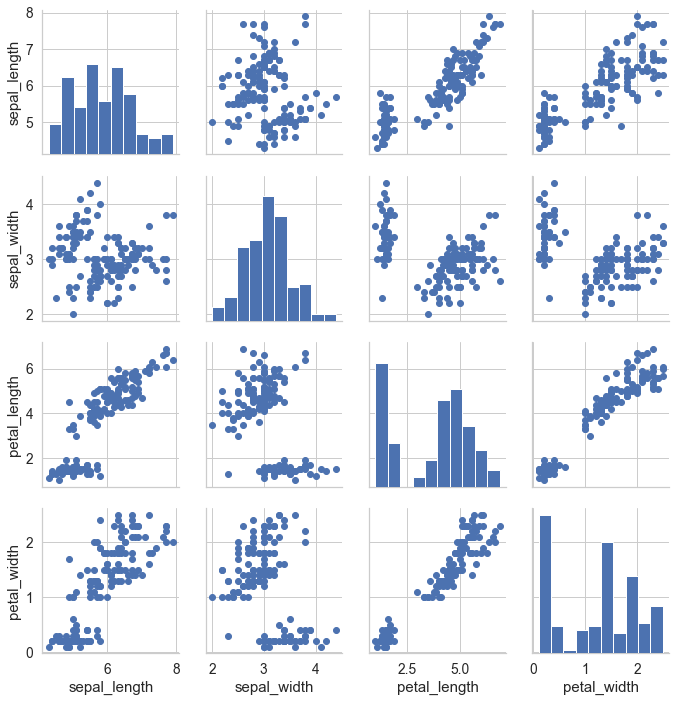

In [ ]:
x = sb.PairGrid(iris)
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)

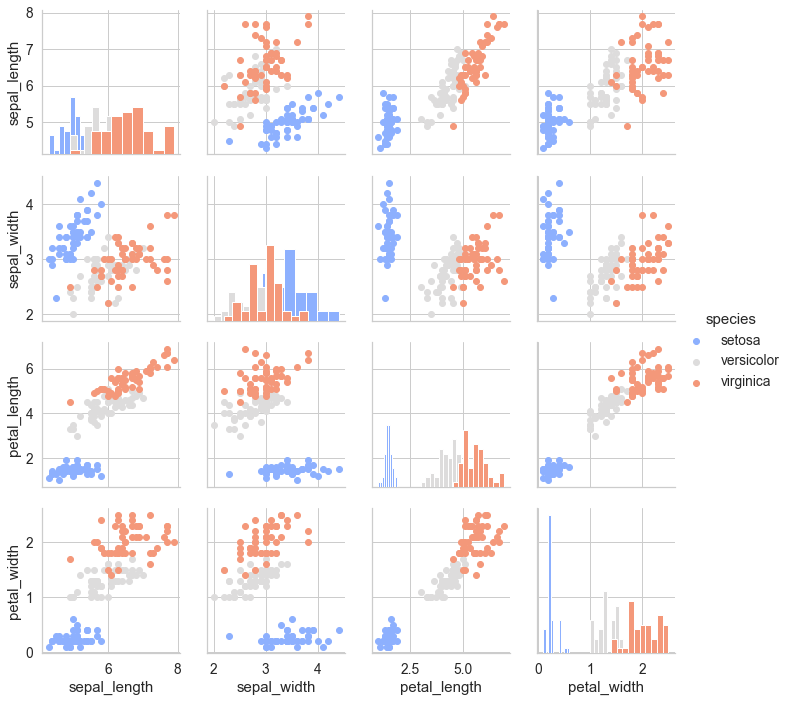

In [ ]:
x = sb.PairGrid(iris, hue = 'species', palette='coolwarm')
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

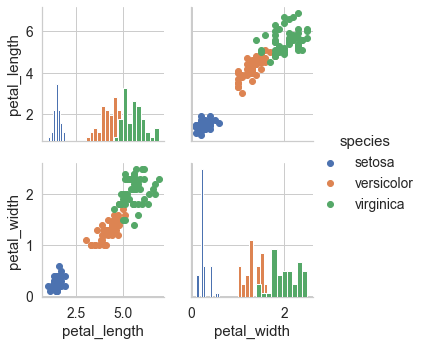

In [ ]:
x = sb.PairGrid(iris, hue='species',vars=['petal_length','petal_width'])
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

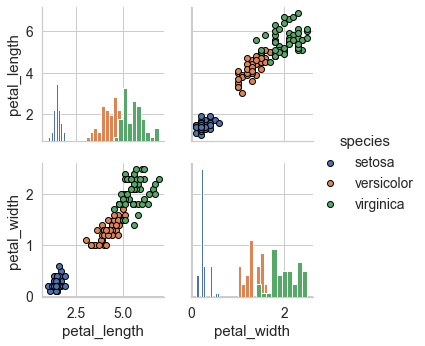

In [ ]:
x = sb.PairGrid(iris, hue='species',vars=['petal_length','petal_width'])
x = x.map_diag(plt.hist, edgecolor='white')
x = x.map_offdiag(plt.scatter, edgecolor='black')
x = x.add_legend()

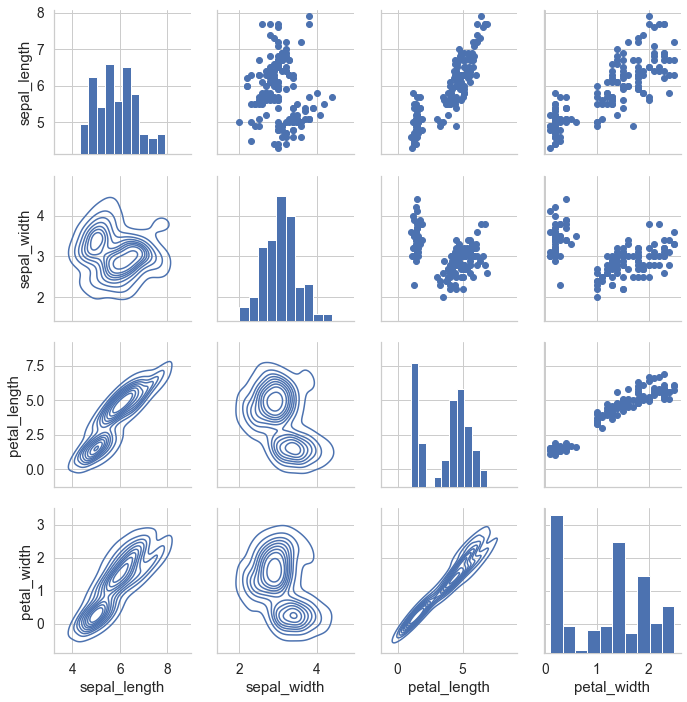

In [ ]:
x = sb.PairGrid(iris)
x = x.map_diag(plt.hist)
x = x.map_upper(plt.scatter)
x = x.map_lower(sb.kdeplot)

### seaborn Heatmap plot

(12.5, -0.5)

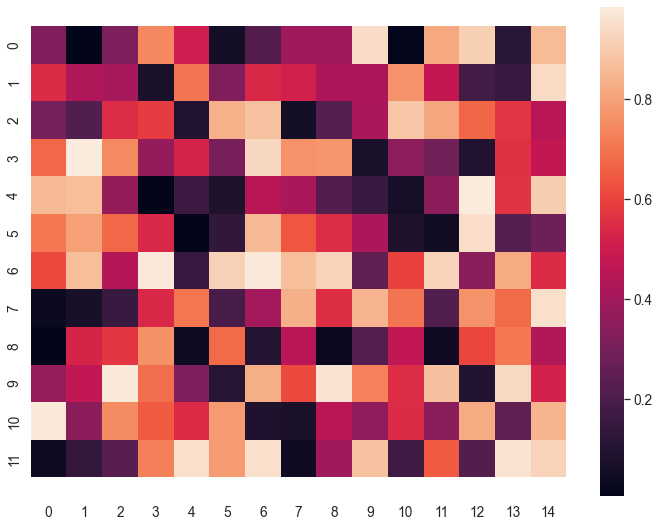

In [ ]:
normal = np.random.rand(12,15)
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(normal)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

(12.5, -0.5)

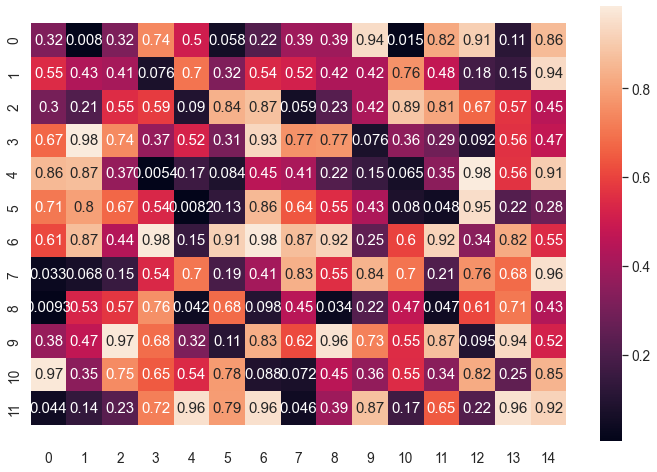

In [ ]:
f, ax = plt.subplots(figsize=(12, 8))
sb.heatmap(normal, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

### Facet Grids

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


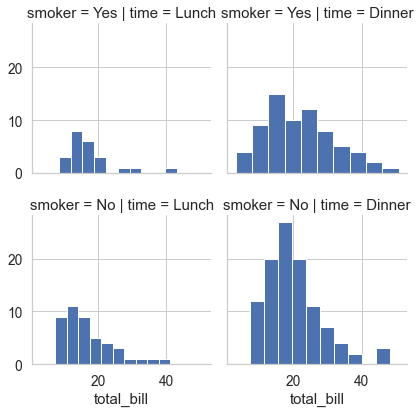

In [ ]:
x = sb.FacetGrid(tips, row='smoker', col='time')
x = x.map(plt.hist, 'total_bill')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


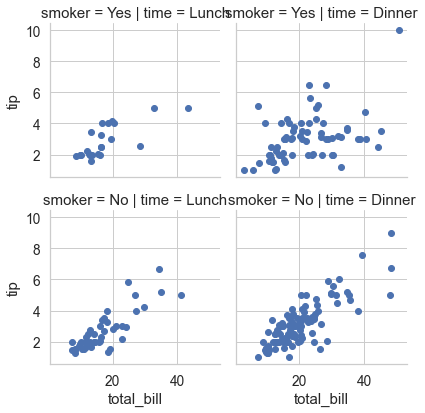

In [ ]:
x = sb.FacetGrid(tips, col='time', row='smoker')
x = x.map(plt.scatter, 'total_bill', 'tip')

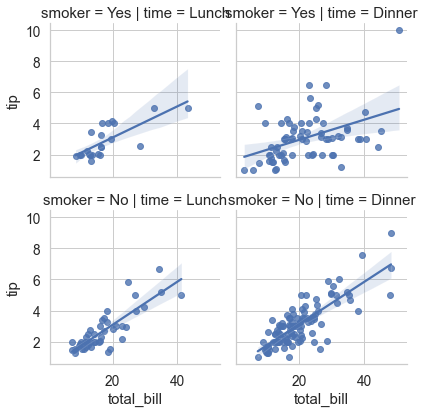

In [ ]:
x = sb.FacetGrid(tips, col='time', row='smoker')
x = x.map(sb.regplot, 'total_bill', 'tip')

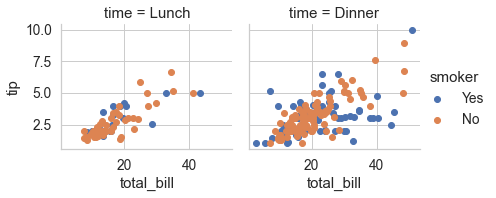

In [ ]:
x = sb.FacetGrid(tips, col='time', hue='smoker')
x = x.map(plt.scatter, 'total_bill', 'tip').add_legend()

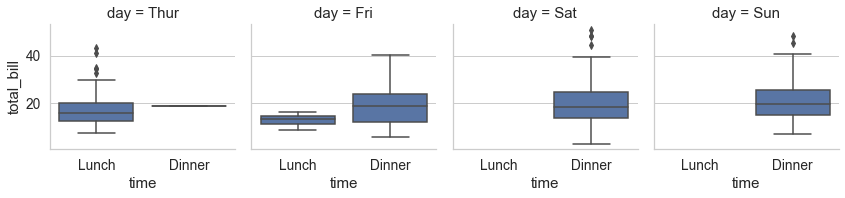

In [ ]:
x = sb.FacetGrid(tips, col='day')
x = x.map(sb.boxplot, 'time', 'total_bill')

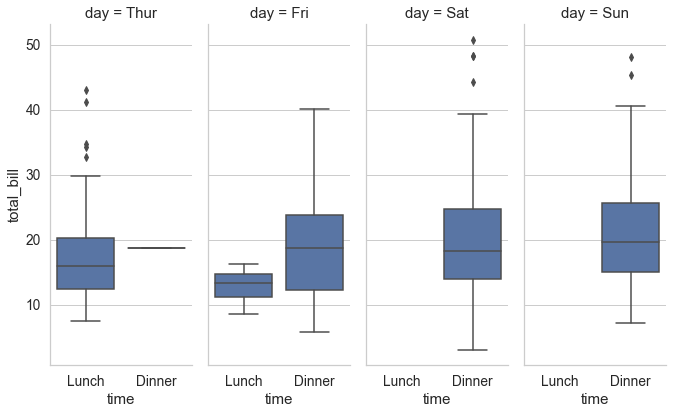

In [ ]:
x = sb.FacetGrid(tips, col='day', size=6, aspect=.4)
x = x.map(sb.boxplot, 'time', 'total_bill')

### seaborn Cluster map

In [ ]:
flights = sb.load_dataset('flights')

In [ ]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [ ]:
flights = flights.pivot('month', 'year', 'passengers')

In [ ]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


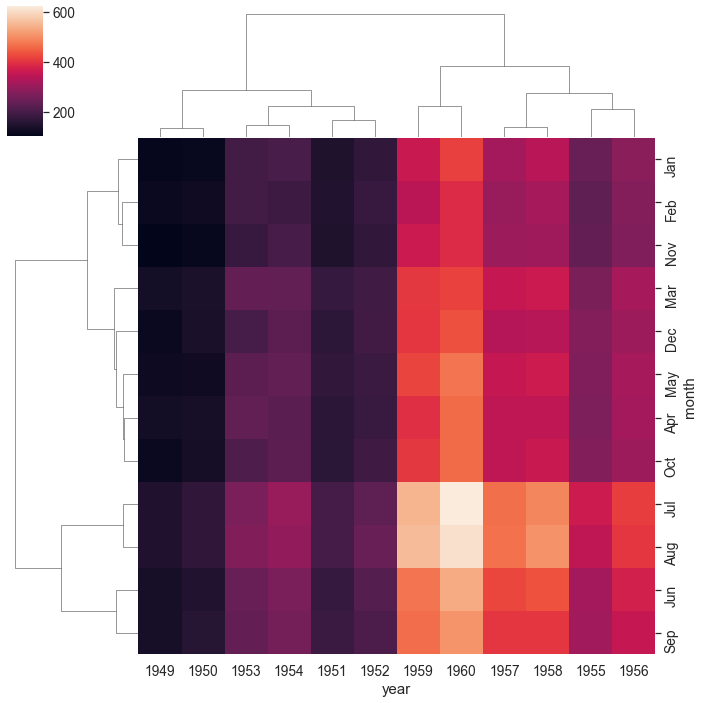

In [ ]:
sb.clustermap(flights)

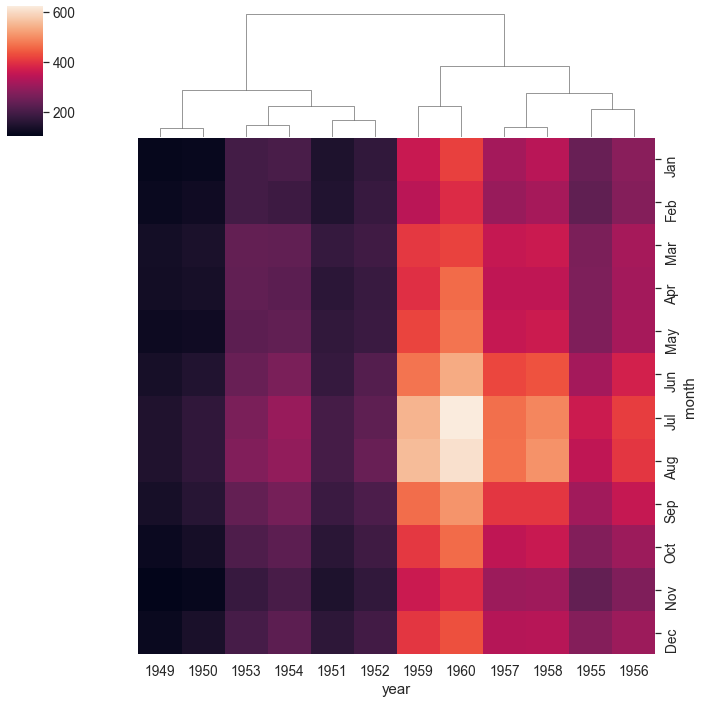

In [ ]:
sb.clustermap(flights, row_cluster=False) # or col_cluster = False

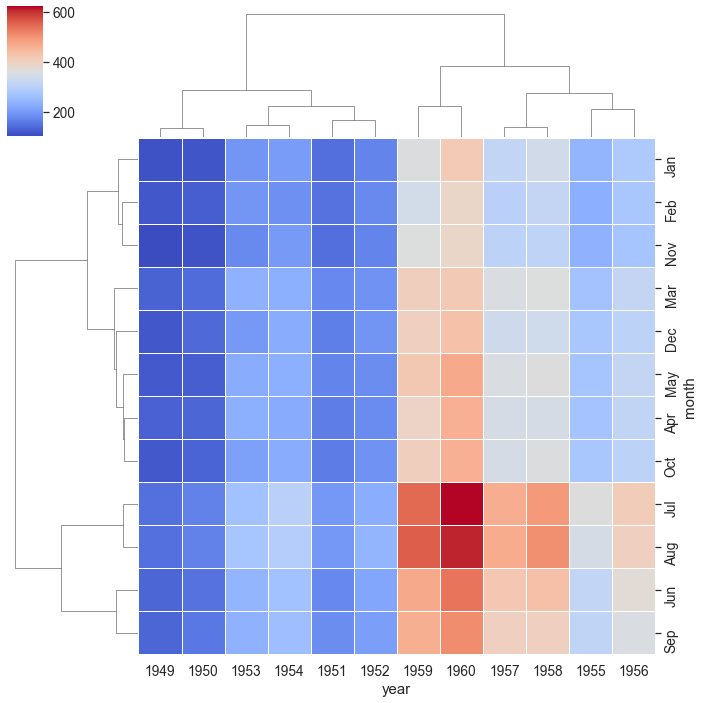

In [ ]:
sb.clustermap(flights, cmap='coolwarm', linewidths=1)

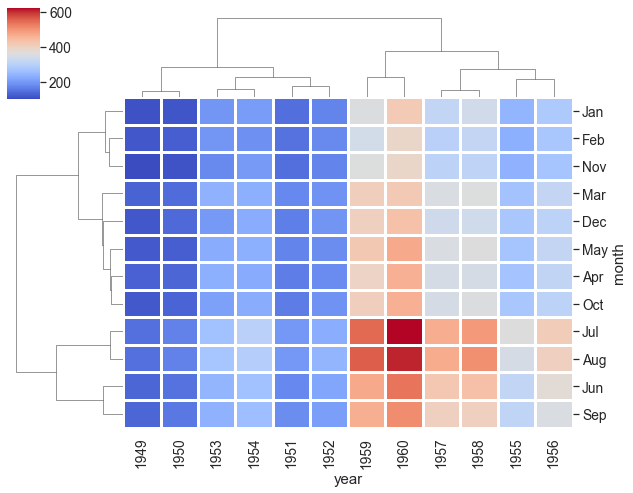

In [ ]:
sb.clustermap(flights, cmap='coolwarm', linewidths=1.2, figsize=(9,7))

### seaborn Joint plot

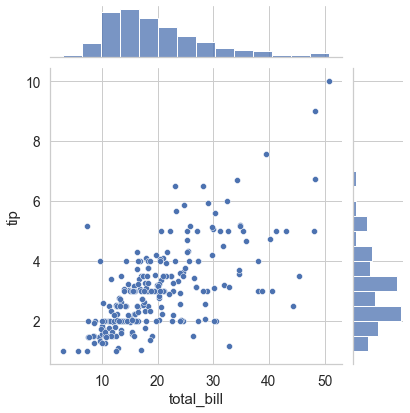

In [ ]:
sb.jointplot(x='total_bill', y='tip', data=tips)

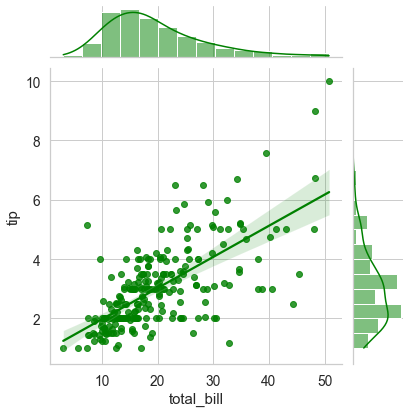

In [ ]:
sb.jointplot(x='total_bill', y='tip', data=tips,color='green', kind='reg')

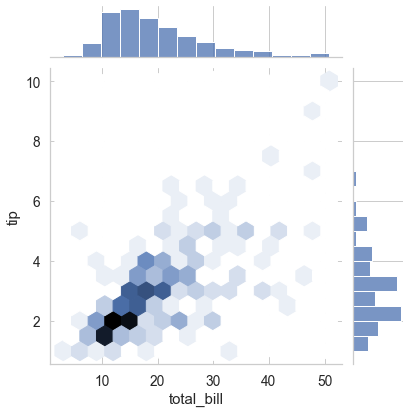

In [ ]:
sb.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

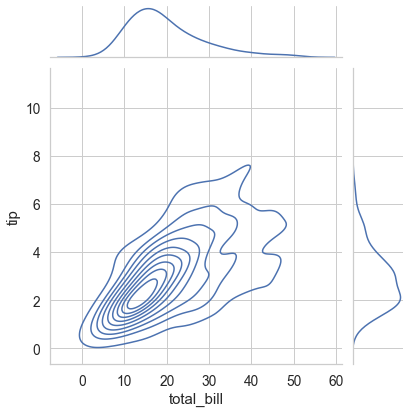

In [ ]:
sb.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

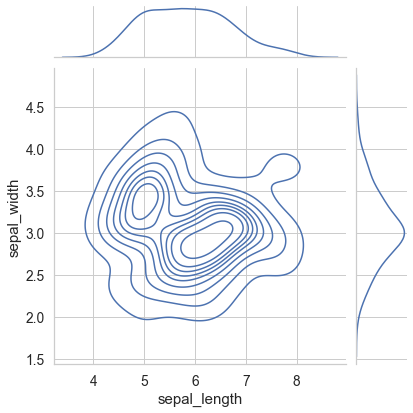

In [ ]:
sb.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='kde')

### seaborn Reg plots

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

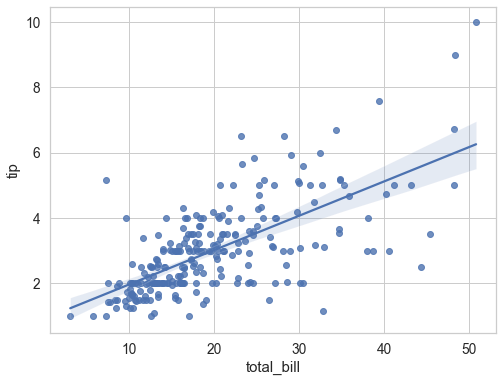

In [ ]:
sb.regplot(x='total_bill', y='tip', data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

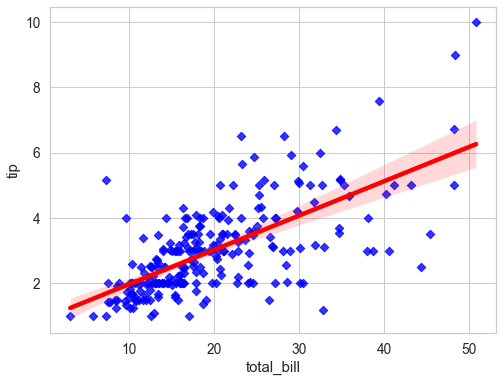

In [ ]:
sb.regplot(x='total_bill', y='tip', data=tips, marker='D',\
           scatter_kws={'color':'blue'},\
           line_kws={'color':'red', 'linewidth':4.5})

In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

<AxesSubplot:xlabel='size', ylabel='total_bill'>

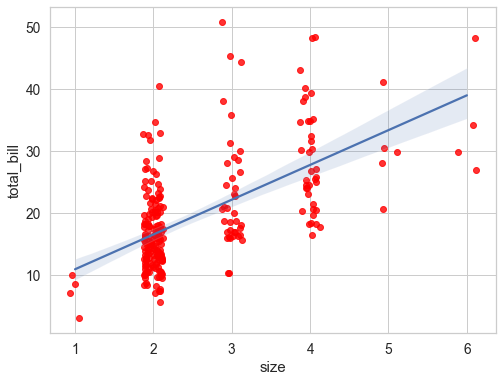

In [ ]:
sb.regplot(x='size', y='total_bill', data=tips, x_jitter=0.13, scatter_kws={'color':'red'})

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Merge, Join and Concatenate
#### left: LEFT OUTER JOIN
#### right: RIGHT OUTER JOIN
#### outer: FULL OUTER JOIN
#### inner: INNER JOIN

In [ ]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])


df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

#### Like rbind in r

In [ ]:
result = df1.append(df2, ignore_index=True, sort=False)

In [ ]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


#### Like cbind in r

In [ ]:
df4=df2

In [ ]:
df4.columns = ['AA', 'BB', 'CC', 'DD']

In [ ]:
df4 = df4.reset_index()

In [ ]:
resultado = pd.concat([df1, df4], axis = 1)

In [ ]:
resultado

,A,B,C,D,index,AA,BB,CC,DD
0,A0,B0,C0,D0,4,A4,B4,C4,D4
1,A1,B1,C1,D1,5,A5,B5,C5,D5
2,A2,B2,C2,D2,6,A6,B6,C6,D6
3,A3,B3,C3,D3,7,A7,B7,C7,D7


In [ ]:
del resultado['index']

#### Concatenate

In [ ]:
s2 = pd.Series(['X0', 'X1', 'X2', 'X3'], index=['A', 'B', 'C', 'D'])
result = df1.append(s2, ignore_index=True)

In [ ]:
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,X0,X1,X2,X3


#### Merge

In [ ]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                      'key2': ['K0', 'K0', 'K0', 'K0'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
result = pd.merge(left, right, on=['key1', 'key2'])

In [ ]:
# how = 'left' or 'right', or 'inner' or 'outer'
result = pd.merge(left, right, how='inner', on=['key1', 'key2'])

In [ ]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [ ]:
# If the user is aware of the duplicates in the right DataFrame 
# but wants to ensure there are no duplicates in the left DataFrame,
#one can use the validate='one_to_many' argument instead
result = pd.merge(left, right, on='key2', how='outer') #, validate="one_to_many")

In [ ]:
result

,key1_x,key2,A,B,key1_y,C,D
0,K0,K0,A0,B0,K0,C0,D0
1,K0,K0,A0,B0,K1,C1,D1
2,K0,K0,A0,B0,K1,C2,D2
3,K0,K0,A0,B0,K2,C3,D3
4,K1,K0,A2,B2,K0,C0,D0
5,K1,K0,A2,B2,K1,C1,D1
6,K1,K0,A2,B2,K1,C2,D2
7,K1,K0,A2,B2,K2,C3,D3
8,K0,K1,A1,B1,NaN,NaN,NaN
9,K2,K1,A3,B3,NaN,NaN,NaN


### Mapping values

In [ ]:
def switch_demo(argument):
    switcher = {
        1: "January",
        2: "February",
        3: "March",
        4: "April",
        5: "May",
        6: "June",
        7: "July",
        8: "August",
        9: "September",
        10: "October",
        11: "November",
        12: "December"
    }
    return switcher.get(argument, "Invalid month")

In [ ]:
switch_demo(3)

'March'

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
gender_dic = {'Male': 1, 'Female': 0}
tips['Gender'] = tips['sex'].map(gender_dic)
#del tips['Gender']

### Exploring the dataset with pandas

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,Gender
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [ ]:
tips[(tips.sex=='Female') & (tips.size>2)]

,total_bill,tip,sex,smoker,day,time,size,Gender
0,16.99,1.01,Female,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0
11,35.26,5.00,Female,No,Sun,Dinner,4,0
14,14.83,3.02,Female,No,Sun,Dinner,2,0
16,10.33,1.67,Female,No,Sun,Dinner,3,0
...,...,...,...,...,...,...,...,...
226,10.09,2.00,Female,Yes,Fri,Lunch,2,0
229,22.12,2.88,Female,Yes,Sat,Dinner,2,0
238,35.83,4.67,Female,No,Sat,Dinner,3,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0


In [ ]:
tips[(tips.sex=='Female') & (tips.size>2)][['total_bill', 'smoker']]

,total_bill,smoker
0,16.99,No
4,24.59,No
11,35.26,No
14,14.83,No
16,10.33,No
...,...,...
226,10.09,Yes
229,22.12,Yes
238,35.83,No
240,27.18,Yes


In [ ]:
tips[(tips.sex=='Female') & (tips.size>2)][['smoker', 'total_bill']].sort_values(by='total_bill', ascending=False)

,smoker,total_bill
102,Yes,44.30
197,Yes,43.11
238,No,35.83
11,No,35.26
85,No,34.83
...,...,...
135,No,8.51
145,No,8.35
111,No,7.25
92,Yes,5.75


In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,Gender
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [ ]:
tips[['day', 'time', 'total_bill']].groupby(['day', 'time']).mean().reset_index()

,day,time,total_bill
0,Thur,Lunch,17.664754
1,Thur,Dinner,18.780000
2,Fri,Lunch,12.845714
3,Fri,Dinner,19.663333
4,Sat,Lunch,NaN
5,Sat,Dinner,20.441379
6,Sun,Lunch,NaN
7,Sun,Dinner,21.410000


In [ ]:
tips[['day', 'tip', 'total_bill']].groupby('day').agg({'tip':'mean', 'total_bill':'sum'}).reset_index()

,day,tip,total_bill
0,Thur,2.771452,1096.33
1,Fri,2.734737,325.88
2,Sat,2.993103,1778.40
3,Sun,3.255132,1627.16


In [ ]:
tips[['day', 'tip', 'total_bill']].groupby('day').agg(['mean', 'sum']).sort_values(by=('total_bill', 'sum')).reset_index()

day       tip         total_bill         
             mean     sum       mean      sum
0   Fri  2.734737   51.96  17.151579   325.88
1  Thur  2.771452  171.83  17.682742  1096.33
2   Sun  3.255132  247.39  21.410000  1627.16
3   Sat  2.993103  260.40  20.441379  1778.40

### IMBALANCE DATA TREATMENT - OVERSAMPLING

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]


In [ ]:
data = pd.read_csv('creditcard.csv',sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.shape

(284807, 31)

In [ ]:
#Create independent and Dependent Features
columns = data.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data[columns]
Y = data[target]
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


Text(0, 0.5, 'Frequency')

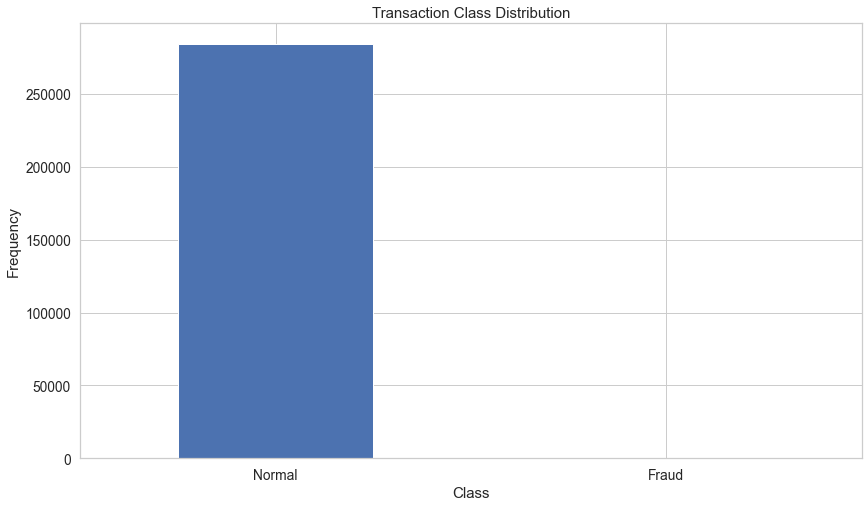

In [ ]:
count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [ ]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### First option imbalance data - OVERSAMPLING

In [ ]:
#from imblearn.combine import SMOTETomek

from imblearn.over_sampling import SMOTE


#from imblearn.under_sampling import NearMiss

In [ ]:
# Implementing OVERSAMPLING for Handling Imbalanced 
#smk = SMOTETomek(random_state=42)
smk = SMOTE(random_state=42)
X_res,y_res=smk.fit_resample(X,Y)

In [ ]:
X_res.shape,y_res.shape

((568630, 30), (568630,))

<AxesSubplot:xlabel='Class', ylabel='Density'>

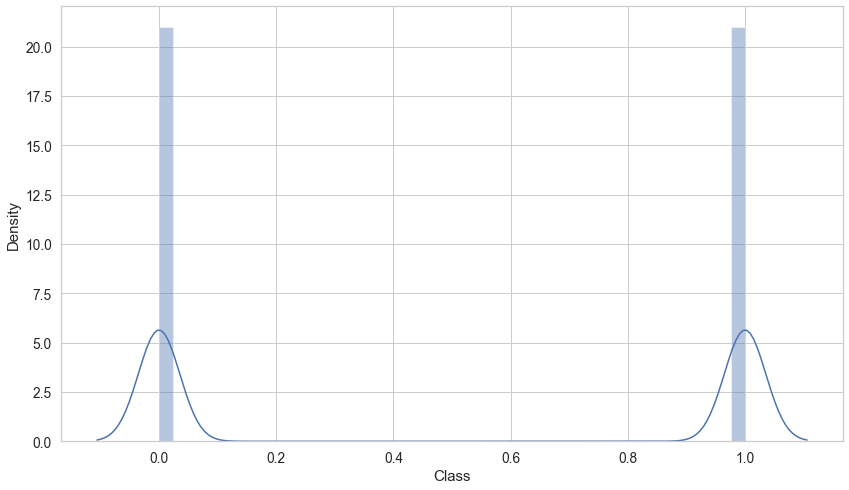

In [ ]:
sns.distplot(y_res)

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))


Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


### Second option imbalance data - OVERSAMPLING

In [ ]:
## RandomOverSampler to handle imbalanced data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42, sampling_strategy=0.6)

In [ ]:
X_train_res, y_train_res = sm.fit_resample(X, Y)

In [ ]:
X_train_res.shape,y_train_res.shape

((454904, 30), (454904,))

In [ ]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_train_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 170589})


### First option imbalance data - UNDERSAMPLING

In [ ]:
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import NearMiss 


In [ ]:
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss()
X_res,y_res=nm.fit_resample(X,Y)

In [ ]:
X_res.shape,y_res.shape


((984, 30), (984,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


### FEATURE ENGINEERING

In [ ]:
import category_encoders as ce

In [ ]:
datos = 'titanic.csv'
dataset = pd.read_csv(datos)

In [ ]:
dataset.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Count Encoding

In [ ]:
cat_features = ['Sex', 'Embarked']
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(dataset[cat_features])

In [ ]:
data = dataset.join(count_encoded.add_suffix("_count"))

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_count,Embarked_count
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,577,644
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,314,168
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,314,644
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,314,644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,577,644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,577,644
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,314,644
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,314,644
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,577,168


### Target Encoding

In [ ]:
datos = 'titanic.csv'
dataset = pd.read_csv(datos)

In [ ]:
cat_features = ['Sex', 'Embarked']
count_enc = ce.CountEncoder()
count_encoded = count_enc.fit_transform(dataset[cat_features])

In [ ]:
# Create the encoder itself
target_enc = ce.TargetEncoder(cols=cat_features)

In [ ]:
#train, valid, _ = get_data_splits(data)

# Fit the encoder using the categorical features and target
target_enc.fit(dataset[cat_features], dataset['Survived'])


TargetEncoder(cols=['Sex', 'Embarked'])

In [ ]:
data = dataset.join(target_enc.transform(dataset[cat_features]).add_suffix('_target'))

In [ ]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_target,Embarked_target
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.188908,0.336957
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.742038,0.553571
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.742038,0.336957
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.742038,0.336957
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.188908,0.336957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0.188908,0.336957
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.742038,0.336957
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0.742038,0.336957
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0.188908,0.553571
